# airbnb Ratings Classification 

#### Matthew Zhang

#### Objective:

Often times AirBnb success is determined by customer experience. In this case, I will be a company analyst looking to help AirBnb hosts improve overall customer satisfication by classifying listings into three categories: Subpar(0), Good(1) and Best(2); further, determining which aspects of listings can be refined.

## Data Cleaning

In [390]:
#Import necessary packages
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,mean_squared_error, plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [391]:
#Import relevant dataset
df = pd.read_csv('data/listings (1).csv.gz')
rev = pd.read_csv('data/reviews.csv.gz')

In [272]:
pd.set_option('display.max_columns', None)
df.head(2)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,109,https://www.airbnb.com/rooms/109,20201103044428,2020-11-03,Amazing bright elegant condo park front *UPGRA...,"*** Unit upgraded with new bamboo flooring, br...",NaN,https://a0.muscache.com/pictures/4321499/1da98...,521,https://www.airbnb.com/users/show/521,Paolo,2008-06-27,"San Francisco, California, United States","Paolo Privitera, CEO Evensi\n\nPaolo, MIT MBA ...",NaN,NaN,0%,f,https://a0.muscache.com/im/pictures/user/e704a...,https://a0.muscache.com/im/pictures/user/e704a...,Culver City,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,NaN,Culver City,Other Cities,33.98209,-118.38494,Entire condominium,Entire home/apt,6,NaN,2 baths,2.0,3.0,"[""Elevator"", ""Cable TV"", ""Air conditioning"", ""...",$115.00,30,730,30.0,30.0,730.0,730.0,30.0,730.0,NaN,t,0,0,0,216,2020-11-03,2,0,0,2011-08-15,2016-05-15,80.0,10.0,10.0,6.0,8.0,10.0,8.0,NaN,f,1,1,0,0,0.02
1,2708,https://www.airbnb.com/rooms/2708,20201103044428,2020-11-04,Beautiful Furnish Mirrored Mini-Suite w/ Firep...,"CDC Airbnb Standard | Steam, Sanitized, Disinf...",We are minutes away from the Mentor Language I...,https://a0.muscache.com/pictures/miso/Hosting-...,3008,https://www.airbnb.com/users/show/3008,Chas.,2008-09-16,"Los Angeles, California, United States",Writer.\r\nLiterary Manager.\r\nPhotographer.\...,within an hour,100%,100%,t,https://a0.muscache.com/im/pictures/user/d17cf...,https://a0.muscache.com/im/pictures/user/d17cf...,Hollywood,2.0,2.0,"['email', 'phone', 'facebook', 'reviews', 'off...",t,t,"Los Angeles, California, United States",Hollywood,City of Los Angeles,34.09768,-118.34602,Private room in apartment,Private room,1,NaN,1.5 baths,1.0,1.0,"[""Host greets you"", ""Elevator"", ""Air condition...",$71.00,30,366,30.0,30.0,1125.0,1125.0,30.0,1125.0,NaN,t,25,55,85,360,2020-11-04,27,5,1,2014-06-09,2020-10-06,97.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,t,2,0,2,0,0.35


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31471 entries, 0 to 31470
Data columns (total 74 columns):
id                                              31471 non-null int64
listing_url                                     31471 non-null object
scrape_id                                       31471 non-null int64
last_scraped                                    31471 non-null object
name                                            31469 non-null object
description                                     30400 non-null object
neighborhood_overview                           20323 non-null object
picture_url                                     31471 non-null object
host_id                                         31471 non-null int64
host_url                                        31471 non-null object
host_name                                       31467 non-null object
host_since                                      31467 non-null object
host_location                                   31389 

In [5]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [8]:
df.head(2)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,target,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,109,https://www.airbnb.com/rooms/109,20201103044428,2020-11-03,Amazing bright elegant condo park front *UPGRA...,"*** Unit upgraded with new bamboo flooring, br...",NaN,https://a0.muscache.com/pictures/4321499/1da98...,521,https://www.airbnb.com/users/show/521,Paolo,2008-06-27,"San Francisco, California, United States","Paolo Privitera, CEO Evensi\n\nPaolo, MIT MBA ...",NaN,NaN,0%,f,https://a0.muscache.com/im/pictures/user/e704a...,https://a0.muscache.com/im/pictures/user/e704a...,Culver City,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,NaN,Culver City,Other Cities,33.98209,-118.38494,Entire condominium,Entire home/apt,6,NaN,2 baths,2.0,3.0,"[""Elevator"", ""Cable TV"", ""Air conditioning"", ""...",$115.00,30,730,30.0,30.0,730.0,730.0,30.0,730.0,NaN,t,0,0,0,216,2020-11-03,2,0,0,2011-08-15,2016-05-15,80.0,10.0,10.0,6.0,8.0,10.0,8.0,NaN,f,1,1,0,0,0.02
1,2708,https://www.airbnb.com/rooms/2708,20201103044428,2020-11-04,Beautiful Furnish Mirrored Mini-Suite w/ Firep...,"CDC Airbnb Standard | Steam, Sanitized, Disinf...",We are minutes away from the Mentor Language I...,https://a0.muscache.com/pictures/miso/Hosting-...,3008,https://www.airbnb.com/users/show/3008,Chas.,2008-09-16,"Los Angeles, California, United States",Writer.\r\nLiterary Manager.\r\nPhotographer.\...,within an hour,100%,100%,t,https://a0.muscache.com/im/pictures/user/d17cf...,https://a0.muscache.com/im/pictures/user/d17cf...,Hollywood,2.0,2.0,"['email', 'phone', 'facebook', 'reviews', 'off...",t,t,"Los Angeles, California, United States",Hollywood,City of Los Angeles,34.09768,-118.34602,Private room in apartment,Private room,1,NaN,1.5 baths,1.0,1.0,"[""Host greets you"", ""Elevator"", ""Air condition...",$71.00,30,366,30.0,30.0,1125.0,1125.0,30.0,1125.0,NaN,t,25,55,85,360,2020-11-04,27,5,1,2014-06-09,2020-10-06,97.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,t,2,0,2,0,0.35


In [9]:
#Examing columns that can be converted to dummy variables
df['host_response_time'].unique()

array([nan, 'within an hour', 'within a few hours', 'within a day',
       'a few days or more'], dtype=object)

I still want to add host_response and host_acceptance rates even though they are object type. They seem to have
relevance. Start by stripping "%" and converting each value to a float.

In [392]:
df['host_response_rate'] = df['host_response_rate'].str.rstrip('%').astype('float') / 100.0
df['host_acceptance_rate'] = df['host_acceptance_rate'].str.rstrip('%').astype('float') / 100.0

Since I will be performing classification based modeling, I want all the variables to be numbers. I decided to create a dataframe with all existing numericals and then adding categoricals that will later be converted to dummy variables.

In [393]:
#Select all int and float types
df1 = pd.DataFrame()
df1 = df.select_dtypes(include=['int64', 'float64'])

In [394]:
#Add relevant categoricals/object types that will be converted to dummies with get_dummies
df1['host_response_time'] = df['host_response_time']
df1['room_type'] = df['room_type']

This is to convert all boolean values to binary encoding.

In [395]:
#Convert t/f to binary encoding.
df1['instant_bookable'] = df['instant_bookable'].map({'f': 0, 't': 1})
df1['has_availability'] = df['has_availability'].map({'f': 0, 't': 1})
df1['host_identity_verified'] = df['host_identity_verified'].map({'f': 0, 't': 1})
df1['host_has_profile_pic'] = df['host_has_profile_pic'].map({'f': 0, 't': 1})
df1['host_is_superhost'] = df['host_is_superhost'].map({'f': 0, 't': 1})

In [234]:
df1.head(2)

,id,scrape_id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_response_time,room_type,instant_bookable,has_availability,host_identity_verified,host_has_profile_pic,host_is_superhost
0,109,20201103044428,521,NaN,0.0,1.0,1.0,33.98209,-118.38494,6,NaN,2.0,3.0,30,730,30.0,30.0,730.0,730.0,30.0,730.0,NaN,0,0,0,216,2,0,0,80.0,10.0,10.0,6.0,8.0,10.0,8.0,1,1,0,0,0.02,NaN,Entire home/apt,0,1,1.0,1.0,0.0
1,2708,20201103044428,3008,1.0,1.0,2.0,2.0,34.09768,-118.34602,1,NaN,1.0,1.0,30,366,30.0,30.0,1125.0,1125.0,30.0,1125.0,NaN,25,55,85,360,27,5,1,97.0,10.0,10.0,10.0,10.0,10.0,10.0,2,0,2,0,0.35,within an hour,Private room,1,1,1.0,1.0,1.0


In [396]:
#One hot encode categoricals (neighbourhood_group_cleansed, host_response_time), drop_first = True for logistic
#Although not required for the other models I will be running
df2 = pd.get_dummies(df1)

#### Null values

Null values for this data set were particulularly interesting since some of the columns didn't have a clear value to
replace the NaN values with. If I were to simply replace NaN's with any measure of central tendency, the distribution
of that column/feature would skew heavily. Also removing the NaN's would potentially remove a lot of important
information as many columns had around 8,000/31,000 null values. 

A count of the null values will be displayed below. However, as there were also many columns with few null values
(2, 4) I made the decision to just drop those rows since there wouldn't be much impact on the distribution of the
data for this case. 2/31,000.

In [278]:
#Clearly there are a lot of null values that need to be dealt with.
df2.head(2)

,id,scrape_id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,instant_bookable,has_availability,host_identity_verified,host_has_profile_pic,host_is_superhost,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,109,20201103044428,521,NaN,0.0,1.0,1.0,33.98209,-118.38494,6,NaN,2.0,3.0,30,730,30.0,30.0,730.0,730.0,30.0,730.0,NaN,0,0,0,216,2,0,0,80.0,10.0,10.0,6.0,8.0,10.0,8.0,1,1,0,0,0.02,0,1,1.0,1.0,0.0,0,0,0,0,1,0,0,0
1,2708,20201103044428,3008,1.0,1.0,2.0,2.0,34.09768,-118.34602,1,NaN,1.0,1.0,30,366,30.0,30.0,1125.0,1125.0,30.0,1125.0,NaN,25,55,85,360,27,5,1,97.0,10.0,10.0,10.0,10.0,10.0,10.0,2,0,2,0,0.35,1,1,1.0,1.0,1.0,0,0,0,1,0,0,1,0


In [279]:
df2.isna().sum()

id                                                  0
scrape_id                                           0
host_id                                             0
host_response_rate                               8288
host_acceptance_rate                             6548
host_listings_count                                 4
host_total_listings_count                           4
latitude                                            0
longitude                                           0
accommodates                                        0
bathrooms                                       31471
bedrooms                                         3640
beds                                              309
minimum_nights                                      0
maximum_nights                                      0
minimum_minimum_nights                              2
maximum_minimum_nights                              2
minimum_maximum_nights                              2
maximum_maximum_nights      

In [397]:
df2 = df2.drop(['bathrooms', 'calendar_updated', 'id', 'scrape_id', 'host_id'], axis=1)

In [398]:
#Based on median: 1.0
df2['host_response_rate'].replace(np.NaN, 1, inplace=True)
df2['bedrooms'].replace(np.NaN, 1, inplace=True)
df2['beds'].replace(np.NaN, 1, inplace=True)
df2['review_scores_checkin'].replace(np.NaN, 10, inplace=True)
df2['review_scores_communication'].replace(np.NaN, 10, inplace=True)
df2['review_scores_location'].replace(np.NaN, 10, inplace=True)
df2['review_scores_accuracy'].replace(np.NaN, 10, inplace=True)

Host Acceptance rate is interesting it has ~8000/31000 null values so making them a single value would skew the
data heavily. The values don't lean toward a specific value so I concluded the best way would be to use 
the np.random_choice() method.

In [399]:
#To show that values are being evenly distributed based on previous percentage distribution
x = df2['host_acceptance_rate'].value_counts(normalize=True)
print(x)

1.00    0.274887
0.99    0.088553
0.98    0.067167
0.97    0.044979
0.00    0.038077
          ...   
0.15    0.000120
0.12    0.000120
0.24    0.000080
0.05    0.000040
0.02    0.000040
Name: host_acceptance_rate, Length: 99, dtype: float64


In [400]:
missing = df2['host_acceptance_rate'].isnull()
df2.loc[missing,'host_acceptance_rate'] = np.random.choice(x.index, size=len(df2[missing]),p=x.values)

In [401]:
df2['host_acceptance_rate'].value_counts(normalize=True)

1.00    0.276191
0.99    0.087954
0.98    0.067364
0.97    0.045566
0.00    0.037463
          ...   
0.15    0.000127
0.07    0.000095
0.02    0.000064
0.05    0.000064
0.24    0.000064
Name: host_acceptance_rate, Length: 99, dtype: float64

The following is repetitive information that fills in ~8,000 null values for each of these specified columns
using random choice to evenly replace NaNs based on percentages each unique values appearance (Hence, normalize=True).

In [402]:
a = df2['review_scores_rating'].value_counts(normalize=True)

In [403]:
missing1 = df2['review_scores_rating'].isnull()
df2.loc[missing1,'review_scores_rating'] = np.random.choice(a.index, size=len(df2[missing1]),p=a.values)

In [404]:
b = df2['review_scores_cleanliness'].value_counts(normalize=True)

In [405]:
missing2 = df2['review_scores_cleanliness'].isnull()
df2.loc[missing2,'review_scores_cleanliness'] = np.random.choice(b.index, size=len(df2[missing2]),p=b.values)

In [406]:
c = df2['review_scores_value'].value_counts(normalize=True)

In [407]:
missing3 = df2['review_scores_value'].isnull()
df2.loc[missing3,'review_scores_value'] = np.random.choice(c.index, size=len(df2[missing3]),p=c.values)

In [408]:
d = df2['reviews_per_month'].value_counts(normalize=True)

In [409]:
missing4 = df2['reviews_per_month'].isnull()
df2.loc[missing4,'reviews_per_month'] = np.random.choice(d.index, size=len(df2[missing4]),p=d.values)

Moving forward, with the final few null values (2, 4) in certain columns. I will be just dropping the rows that contain null values as it will not have a significant impact on the data.

In [410]:
#Simple line that drops all remaining null values.
df2.dropna(inplace=True)

In [294]:
df2.head(2)

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,instant_bookable,has_availability,host_identity_verified,host_has_profile_pic,host_is_superhost,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,1.0,0.0,1.0,1.0,33.98209,-118.38494,6,2.0,3.0,30,730,30.0,30.0,730.0,730.0,30.0,730.0,0,0,0,216,2,0,0,80.0,10.0,10.0,6.0,8.0,10.0,8.0,1,1,0,0,0.02,0,1,1.0,1.0,0.0,0,0,0,0,1,0,0,0
1,1.0,1.0,2.0,2.0,34.09768,-118.34602,1,1.0,1.0,30,366,30.0,30.0,1125.0,1125.0,30.0,1125.0,25,55,85,360,27,5,1,97.0,10.0,10.0,10.0,10.0,10.0,10.0,2,0,2,0,0.35,1,1,1.0,1.0,1.0,0,0,0,1,0,0,1,0


In [411]:
df2.isna().sum()

host_response_rate                              0
host_acceptance_rate                            0
host_listings_count                             0
host_total_listings_count                       0
latitude                                        0
longitude                                       0
accommodates                                    0
bedrooms                                        0
beds                                            0
minimum_nights                                  0
maximum_nights                                  0
minimum_minimum_nights                          0
maximum_minimum_nights                          0
minimum_maximum_nights                          0
maximum_maximum_nights                          0
minimum_nights_avg_ntm                          0
maximum_nights_avg_ntm                          0
availability_30                                 0
availability_60                                 0
availability_90                                 0


In [225]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31465 entries, 0 to 31470
Data columns (total 49 columns):
host_response_rate                              31465 non-null float64
host_acceptance_rate                            31465 non-null float64
host_listings_count                             31465 non-null float64
host_total_listings_count                       31465 non-null float64
latitude                                        31465 non-null float64
longitude                                       31465 non-null float64
accommodates                                    31465 non-null int64
bedrooms                                        31465 non-null float64
beds                                            31465 non-null float64
minimum_nights                                  31465 non-null int64
maximum_nights                                  31465 non-null int64
minimum_minimum_nights                          31465 non-null float64
maximum_minimum_nights                       

Here I will be classifying each of our classes as a number. There are three classes that hint to ternary-class models:
and these classes are binned based on rating performance. I have labeled the classes 0 (subpar), 1 (great), 2(best) based on the ranges (0-94], (94-99], (99-100], respectively.

The process I took when experimenting with unique ranges.
#Old:
#df_best = df.loc[(df['review_scores_rating'] == 100)]
#df_great = df.loc[(df['review_scores_rating'] < 100) & (df['review_scores_rating'] >= 95)]
#df_good = df.loc[(df['review_scores_rating'] >= 80) & (df['review_scores_rating'] < 95)]
#df_bad = df.loc[(df['review_scores_rating'] < 80)]

#New:
#df_best = df.loc[(df['review_scores_rating'] == 100)]
#df_great = df.loc[(df['review_scores_rating'] < 100) & (df['review_scores_rating'] >= 95)]
#df_subpar = df.loc[(df['review_scores_rating'] < 95)]

#Descriptions:
#Best: The best score of 100
#Great: 95-100, contains the median, mode
#Supbar: Lower than the mean of 95

In [415]:
df2['target'] = pd.cut(df2['review_scores_rating'], [0, 95, 99, 100], right=True, \
                      labels=['0', '1', '2'])

In [416]:
df2.drop('review_scores_rating', axis=1, inplace=True)

In [417]:
df2['target'].value_counts()

0    11771
1    10456
2     9238
Name: target, dtype: int64

As you can see, my cutoffs for each class are not only suitable ranges, but also address class imbalance. I made these cutoff decisions based on measures of central tendency where the 'best'(2) class has only perfect scores, the 'great'(1) class has scores greater than the mean up to, but not including, the best (median and mode) and the 'subpar'(0) class contains all values lower than the mean.

Some additional explanation: After conducting side research on airbnb ratings, all values lower than the mean potentially represent ratings where customers had felt their experience was not the best and could have complaints/suggestions to make.

Class imbalance: For future datasets, my solution to class imbalance will not particularly be the same as it is here. I would definitely implement SMOTE (which creates artificial data in underrepresented classes). 

In [418]:
#Binned using .cut; however, still category type. Converting to numeric 
df2['target'] = pd.to_numeric(df2['target'], errors='coerce')

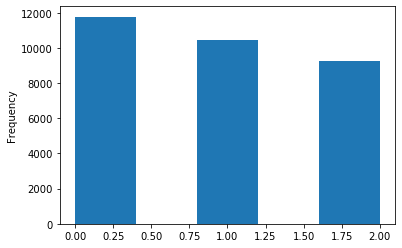

In [419]:
#Visualization of target class distribution.
df2['target'].plot.hist(bins=5)

In [322]:
df2.head(2)

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,instant_bookable,has_availability,host_identity_verified,host_has_profile_pic,host_is_superhost,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,target
0,1.0,0.0,1.0,1.0,33.98209,-118.38494,6,2.0,3.0,30,730,30.0,30.0,730.0,730.0,30.0,730.0,0,0,0,216,2,0,0,80.0,10.0,10.0,6.0,8.0,10.0,8.0,1,1,0,0,0.02,0,1,1.0,1.0,0.0,0,0,0,0,1,0,0,0,0
1,1.0,1.0,2.0,2.0,34.09768,-118.34602,1,1.0,1.0,30,366,30.0,30.0,1125.0,1125.0,30.0,1125.0,25,55,85,360,27,5,1,97.0,10.0,10.0,10.0,10.0,10.0,10.0,2,0,2,0,0.35,1,1,1.0,1.0,1.0,0,0,0,1,0,0,1,0,1


In [420]:
#Dropping unnecessary or redundant/repititve columns
df2.drop(['host_listings_count', 'host_total_listings_count', 'minimum_minimum_nights', 'maximum_minimum_nights', \
        'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', \
        'number_of_reviews_ltm', 'number_of_reviews_l30d', 'calculated_host_listings_count', \
        'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', \
        'calculated_host_listings_count_shared_rooms'], axis=1, inplace=True)

In [345]:
#Outlier features checks: ACCOMODATES, BEDROOMS, BEDS, MINIMUM_NIGHTS(remove single values)
df2['beds'].value_counts()

1.0     15800
2.0      7160
3.0      3191
4.0      2121
0.0      1210
5.0       895
6.0       561
7.0       211
8.0       144
9.0        66
10.0       42
12.0       16
11.0       16
14.0       11
16.0        4
22.0        3
13.0        3
19.0        2
15.0        2
32.0        1
50.0        1
44.0        1
18.0        1
20.0        1
21.0        1
23.0        1
Name: beds, dtype: int64

In [421]:
#Create a dataframe with non binary/discrete values to look at boxplot distribution and remove any outliers.
non_bin = df2[['accommodates', 'bedrooms', 'beds', 'minimum_nights', 'maximum_nights', 'number_of_reviews', \
              'reviews_per_month']]

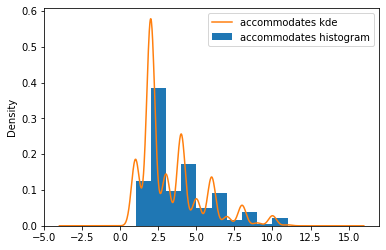

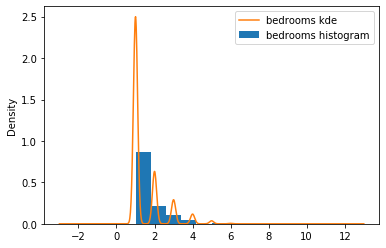

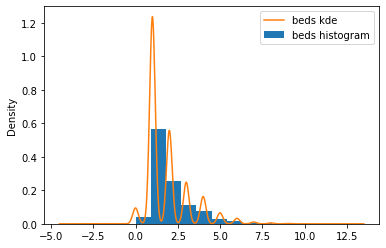

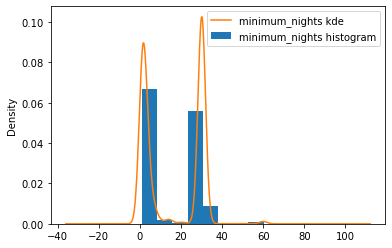

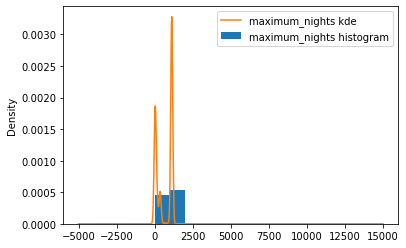

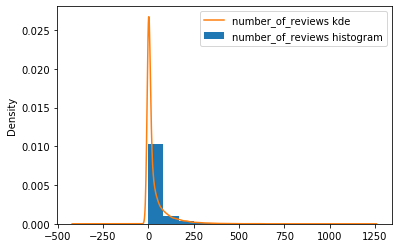

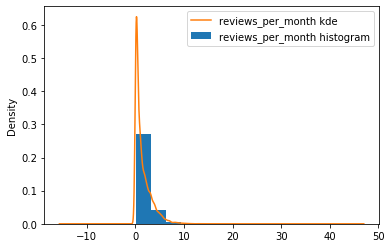

In [388]:
for column in non_bin:
    non_bin[column].plot.hist(density=True, label= column+' histogram')
    non_bin[column].plot.kde(label=column+' kde')
    plt.legend()
    plt.show()

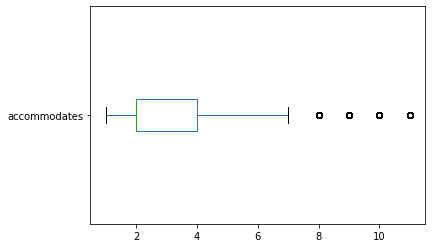

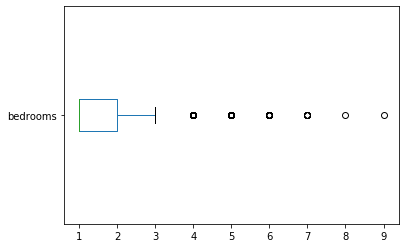

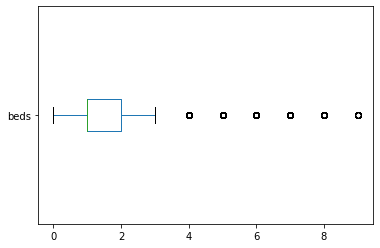

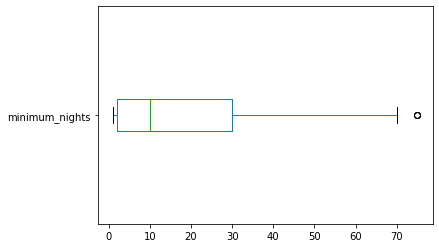

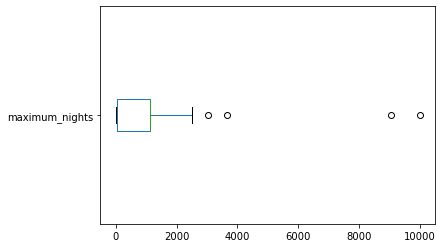

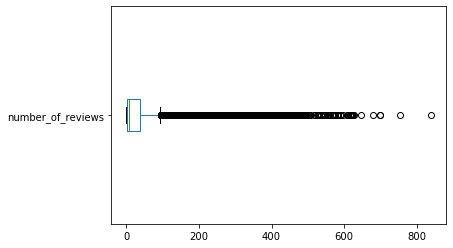

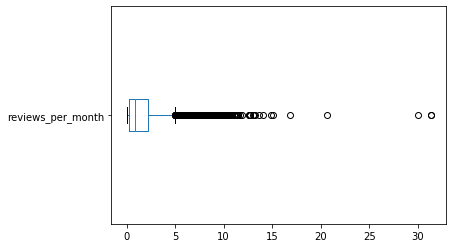

In [380]:
for column in non_bin:
    non_bin[column].plot.box(vert=False)
    plt.show()

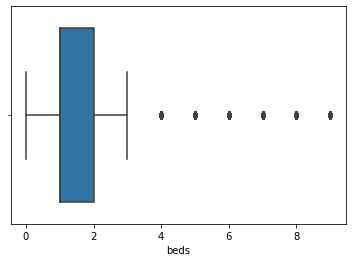

In [385]:
sns.boxplot(x=df2['beds'])

Removing outliers from each column based on visual boxplots:

In [422]:
df2 = df2.loc[(df2['beds'] < 10)]

In [423]:
df2 = df2.loc[(df2['minimum_nights'] < 80)]

In [424]:
df2 = df2.loc[(df2['accommodates'] < 12)]

In [425]:
df2 = df2.loc[(df2['bedrooms'] < 10)]

In [426]:
df2 = df2.loc[(df2['maximum_nights'] < 5000)]

In [427]:
df2 = df2.loc[(df2['number_of_reviews'] < 600)]

In [437]:
df2 = df2.loc[(df2['reviews_per_month'] < 15)]

## EDA

Exploratory Data Analysis (EDA) here consists of creating visualizations in order to understand and summarize key characteristics of my data. I will mostly be illustrating visuals on what my features/columns look across my three classes.
Specifically, looking for variance/seperability within classes so the model can make better predictions and can theoretically distinguish the classes better.

In [430]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30448 entries, 0 to 31470
Data columns (total 35 columns):
host_response_rate                       30448 non-null float64
host_acceptance_rate                     30448 non-null float64
latitude                                 30448 non-null float64
longitude                                30448 non-null float64
accommodates                             30448 non-null int64
bedrooms                                 30448 non-null float64
beds                                     30448 non-null float64
minimum_nights                           30448 non-null int64
maximum_nights                           30448 non-null int64
availability_30                          30448 non-null int64
availability_60                          30448 non-null int64
availability_90                          30448 non-null int64
availability_365                         30448 non-null int64
number_of_reviews                        30448 non-null int64
review_scor

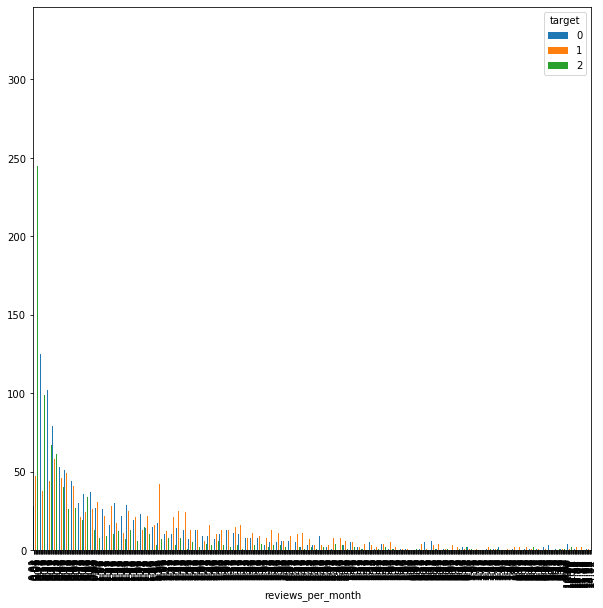

In [435]:
pd.crosstab(df2['reviews_per_month'], df2['target']).plot.bar(figsize=(10,10))

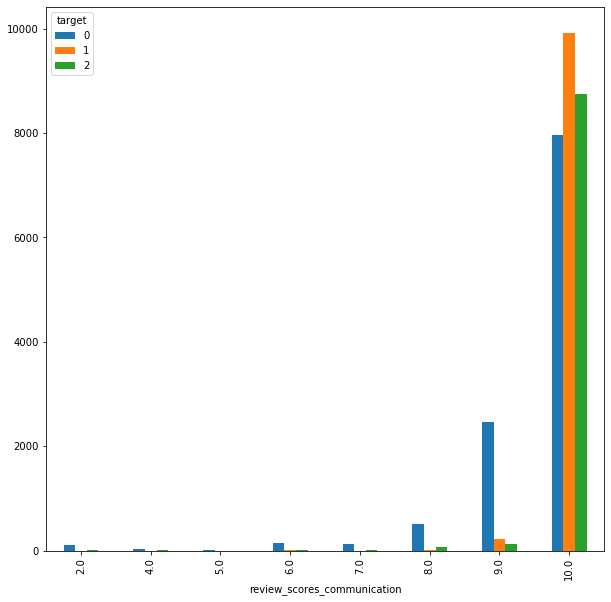

In [440]:
pd.crosstab(df2['review_scores_communication'], df2['target']).plot.bar(figsize=(10,10))
#Noteable trend, for the subpar class, although it has some perfect scores, it has scores for every value down to 2 more
#prominent than the other, better classes.
#So, communication was not that great.

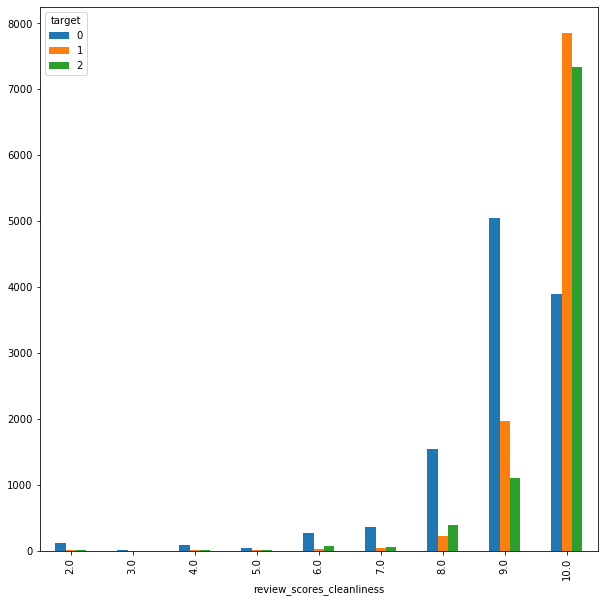

In [441]:
pd.crosstab(df2['review_scores_cleanliness'], df2['target']).plot.bar(figsize=(10,10))
#Similar trend, 1,2 have a lot more perfect scores than 0 and 0 is more prominent in the other scores down to 2.

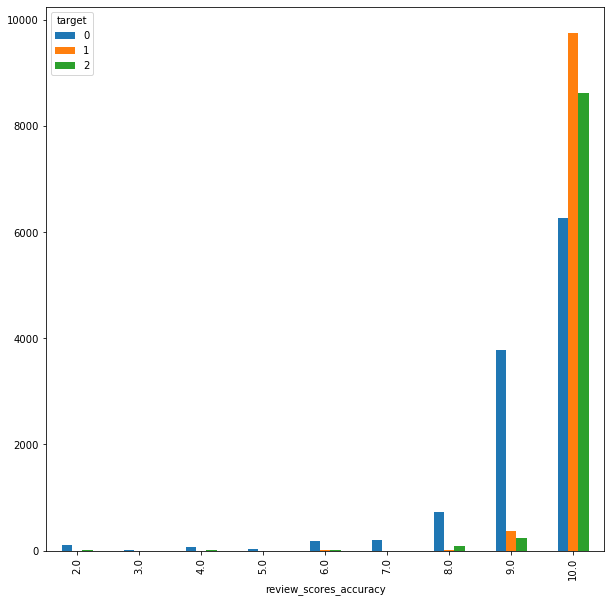

In [442]:
pd.crosstab(df2['review_scores_accuracy'], df2['target']).plot.bar(figsize=(10,10))

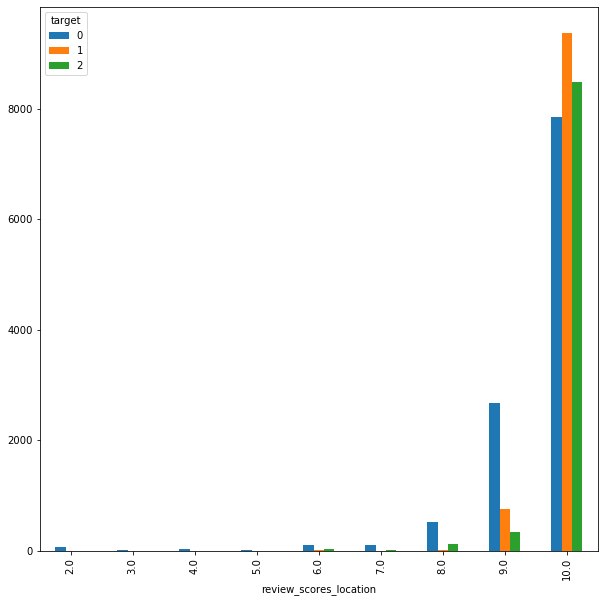

In [443]:
pd.crosstab(df2['review_scores_location'], df2['target']).plot.bar(figsize=(10,10))

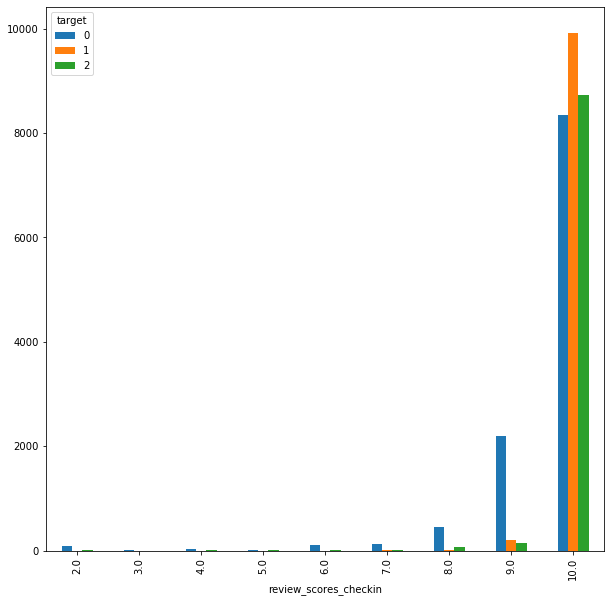

In [444]:
pd.crosstab(df2['review_scores_checkin'], df2['target']).plot.bar(figsize=(10,10))

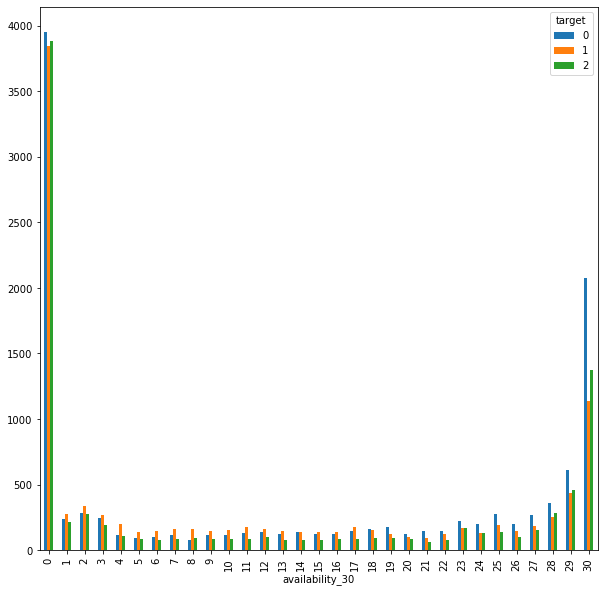

In [445]:
pd.crosstab(df2['availability_30'], df2['target']).plot.bar(figsize=(10,10))
#As you can see within 0 days, essentially none of the classes are booked. But, as you progress up to 30, class 0 is
#more available and we can conclude that less people book the lower rated listings.

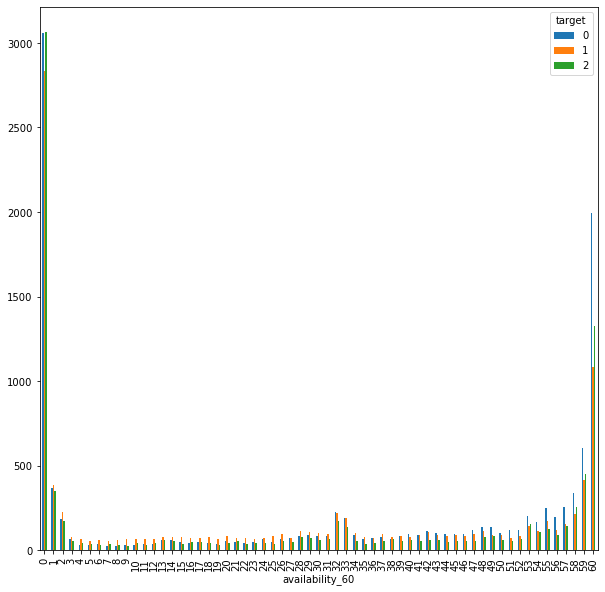

In [447]:
pd.crosstab(df2['availability_60'], df2['target']).plot.bar(figsize=(10,10))
#Very similar trend to availability within 30 days

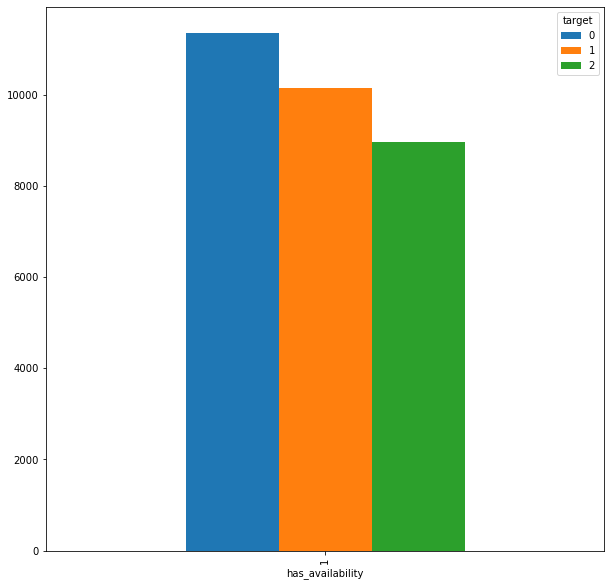

In [449]:
pd.crosstab(df2['has_availability'], df2['target']).plot.bar(figsize=(10,10))
#This graph tells us the lower rating listings have more availability versus the better rating listings.
#Which intuitively makes perfect sense. The better listings will have lower availability since they are being booked.

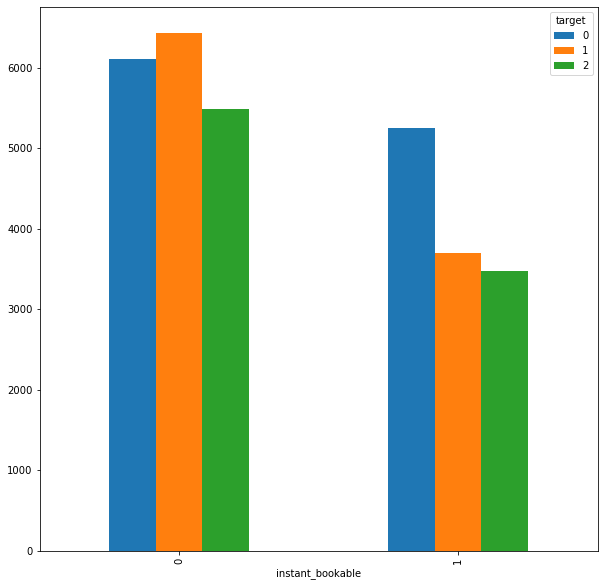

In [450]:
pd.crosstab(df2['instant_bookable'], df2['target']).plot.bar(figsize=(10,10))
#The better rated listings are probably less "instantly bookable" because people plan ahead to reserve better listings

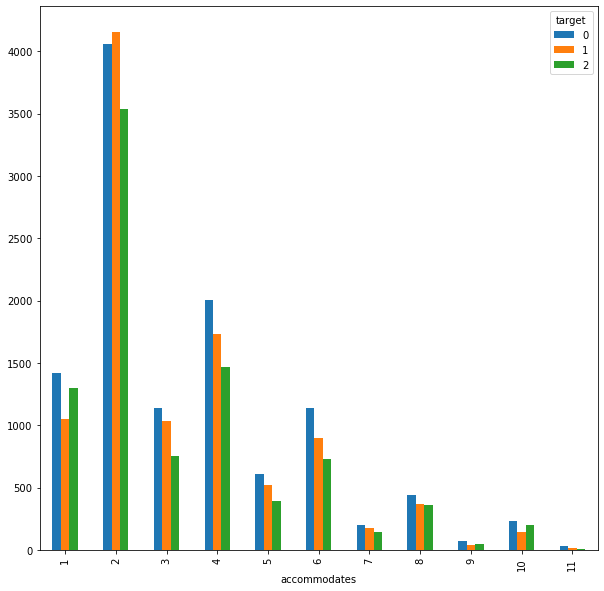

In [467]:
pd.crosstab(df2['accommodates'], df2['target']).plot.bar(figsize=(10,10))

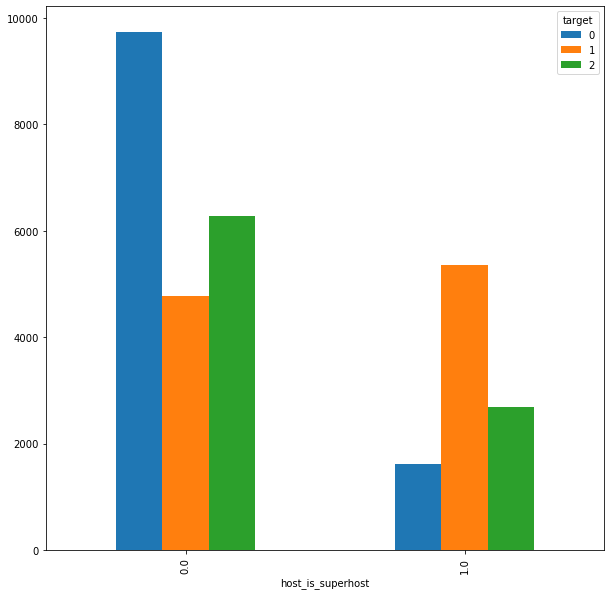

In [472]:
pd.crosstab(df2['host_is_superhost'], df2['target']).plot.bar(figsize=(10,10))
#Classes 1 and 2 have way more superhost status than class 0. A superhost is a verified host that provides excellent
#experiences and stays and is a "role model".

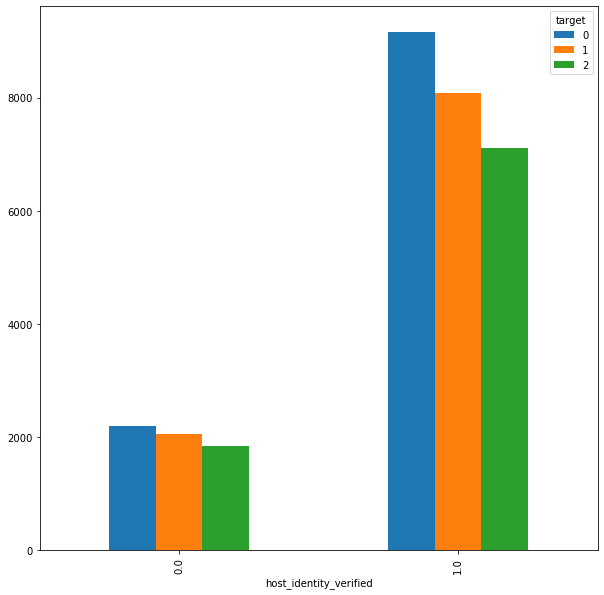

In [473]:
pd.crosstab(df2['host_identity_verified'], df2['target']).plot.bar(figsize=(10,10))

Exploring different types of graphs

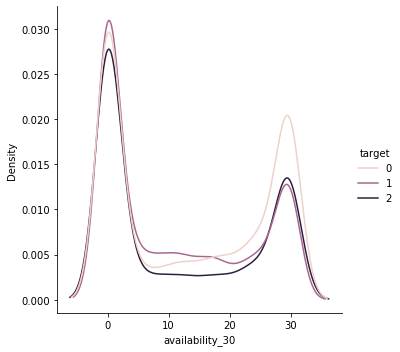

In [459]:
sns.displot(data=df2, x='availability_30', hue='target', kind='kde')

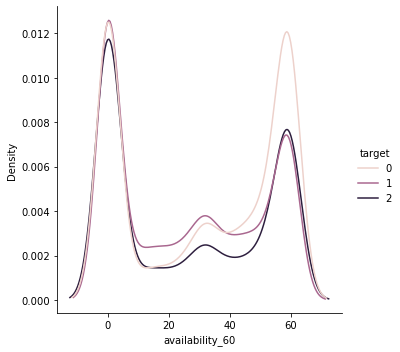

In [460]:
sns.displot(data=df2, x='availability_60', hue='target', kind='kde')

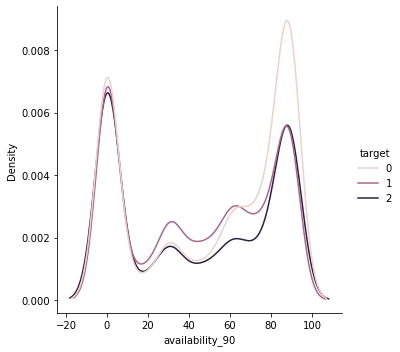

In [461]:
sns.displot(data=df2, x='availability_90', hue='target', kind='kde')

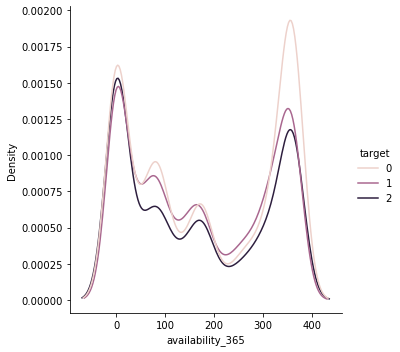

In [462]:
sns.displot(data=df2, x='availability_365', hue='target', kind='kde')

This graph helps visualize the avaibility within 30, 60, 90, 365 days better than the barplots do. A trend to notice is that class 0 (subpar) consistently has more avaibility while class 2(best) is always booked and has the least availability out of the classes.

In [463]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30448 entries, 0 to 31470
Data columns (total 35 columns):
host_response_rate                       30448 non-null float64
host_acceptance_rate                     30448 non-null float64
latitude                                 30448 non-null float64
longitude                                30448 non-null float64
accommodates                             30448 non-null int64
bedrooms                                 30448 non-null float64
beds                                     30448 non-null float64
minimum_nights                           30448 non-null int64
maximum_nights                           30448 non-null int64
availability_30                          30448 non-null int64
availability_60                          30448 non-null int64
availability_90                          30448 non-null int64
availability_365                         30448 non-null int64
number_of_reviews                        30448 non-null int64
review_scor

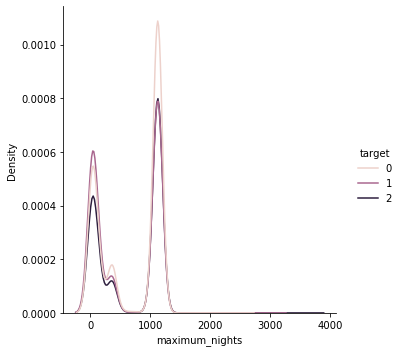

In [464]:
sns.displot(data=df2, x='maximum_nights', hue='target', kind='kde')

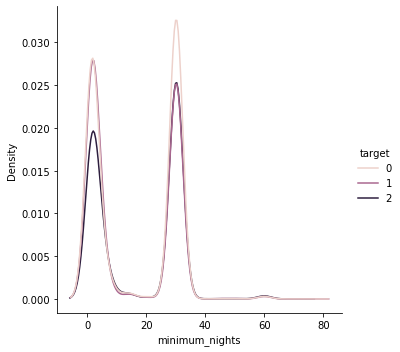

In [465]:
sns.displot(data=df2, x='minimum_nights', hue='target', kind='kde')

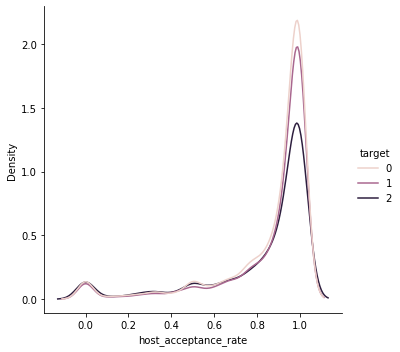

In [468]:
sns.displot(data=df2, x='host_acceptance_rate', hue='target', kind='kde')
#Maybe the lower rating listings accept for people because they need money? And therefore the quality of the listing
#is lower. Conversely, the best rating listings are more strict on the rating of the guest and whether or not they
#are allowed to stay.

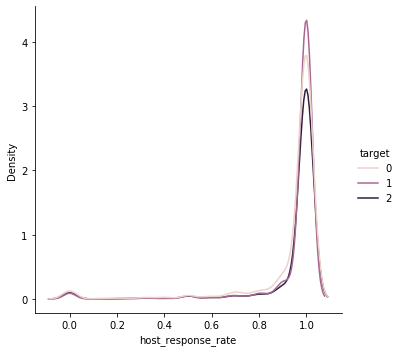

In [469]:
sns.displot(data=df2, x='host_response_rate', hue='target', kind='kde')

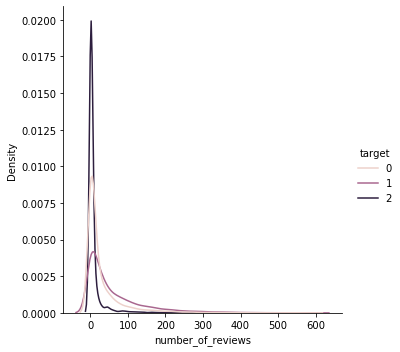

In [470]:
sns.displot(data=df2, x='number_of_reviews', hue='target', kind='kde')
#Class 2 seems to have a lot of listings with ~0-30 reviews by a large margin.

In [474]:
df2.head(2)

,host_response_rate,host_acceptance_rate,latitude,longitude,accommodates,bedrooms,beds,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,instant_bookable,has_availability,host_identity_verified,host_has_profile_pic,host_is_superhost,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,target
0,1.0,0.0,33.98209,-118.38494,6,2.0,3.0,30,730,0,0,0,216,2,10.0,10.0,6.0,8.0,10.0,8.0,0.02,0,1,1.0,1.0,0.0,0,0,0,0,1,0,0,0,0
1,1.0,1.0,34.09768,-118.34602,1,1.0,1.0,30,366,25,55,85,360,27,10.0,10.0,10.0,10.0,10.0,10.0,0.35,1,1,1.0,1.0,1.0,0,0,0,1,0,0,1,0,1


In [487]:
testx = df2[['review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', \
            'review_scores_communication', 'review_scores_location', 'review_scores_value']]
testy = df2['target']

In [515]:
# Instantiate KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

# Fit the classifier
clf.fit(testx, testy)

# Predict on the test set
test_preds = clf.predict([[10, 10, 9, 10, 10, 10]])

In [516]:
test_preds

array([1])

## Initial Modeling

In [478]:
#Define your X and Y for train, test split
X = df2.drop(['target'],axis=1)
y = df2['target']

In [479]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### KNN

KNN (K-Nearest Neighbors) modeling.

In [475]:
from sklearn.neighbors import KNeighborsClassifier

In [531]:
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        f1 = f1_score(y_test, preds, average='weighted')
        if f1 > best_score:
            best_k = k
            best_score = f1
    
    print("Best Value for k: {}".format(best_k))
    print("F1-Score: {}".format(best_score))

In [517]:
#This is for KNN because it uses distance so if data is not on the same scale, it will be weighted differently
from sklearn.preprocessing import StandardScaler

In [518]:
#Transforming X_train and X_test using StandardScaler
#Fit is where StandardScaler understand the distribution and variance of the data a learns how to scale it.
#Transform then applies the "memorized" fit and applies the scaling.
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#Running a baseline KNN model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_predict = knn.predict(X_test)

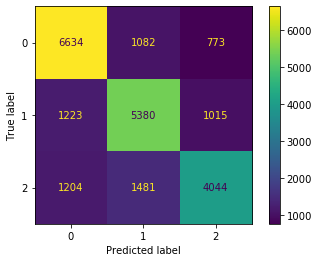

In [520]:
plot_confusion_matrix(knn, X_train, y_train)

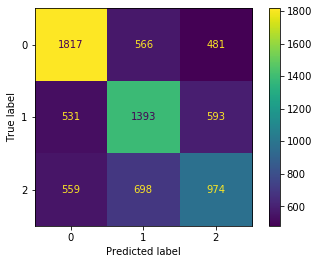

In [519]:
plot_confusion_matrix(knn, X_test, y_test)

In [521]:
print(classification_report(y_train, knn.predict(X_train)))
print(classification_report(y_test, knn.predict(X_test)))

              precision    recall  f1-score   support

           0       0.73      0.78      0.76      8489
           1       0.68      0.71      0.69      7618
           2       0.69      0.60      0.64      6729

    accuracy                           0.70     22836
   macro avg       0.70      0.70      0.70     22836
weighted avg       0.70      0.70      0.70     22836

              precision    recall  f1-score   support

           0       0.63      0.63      0.63      2864
           1       0.52      0.55      0.54      2517
           2       0.48      0.44      0.46      2231

    accuracy                           0.55      7612
   macro avg       0.54      0.54      0.54      7612
weighted avg       0.55      0.55      0.55      7612



In [532]:
#Testing values for the best k using defined function above.
find_best_k(X_train, y_train, X_test, y_test)

Best Value for k: 21
F1-Score: 0.584361020236995


In [543]:
#Running adjusted KNN parameters model.
knn = KNeighborsClassifier(n_neighbors=21)
knn.fit(X_train, y_train)

y_predict = knn.predict(X_test)

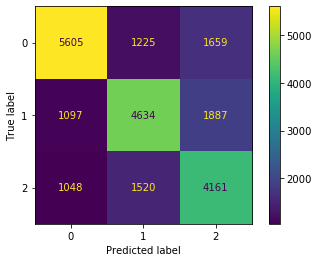

In [544]:
plot_confusion_matrix(knn, X_train, y_train)

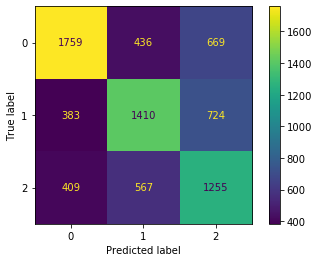

In [545]:
plot_confusion_matrix(knn, X_test, y_test)

In [546]:
print(classification_report(y_train, knn.predict(X_train)))
print(classification_report(y_test, knn.predict(X_test)))

              precision    recall  f1-score   support

           0       0.72      0.66      0.69      8489
           1       0.63      0.61      0.62      7618
           2       0.54      0.62      0.58      6729

    accuracy                           0.63     22836
   macro avg       0.63      0.63      0.63     22836
weighted avg       0.64      0.63      0.63     22836

              precision    recall  f1-score   support

           0       0.69      0.61      0.65      2864
           1       0.58      0.56      0.57      2517
           2       0.47      0.56      0.51      2231

    accuracy                           0.58      7612
   macro avg       0.58      0.58      0.58      7612
weighted avg       0.59      0.58      0.58      7612



In [550]:
print("Testing Accuracy: {}".format(accuracy_score(y_test, y_predict)))

Testing Accuracy: 0.581187598528639


Improved by .03 in terms of model accuracy. The adjusted model performs better by .05 looking at the weighted average. The F1 score also increased slightly.

### Decision Trees

Decision Tree modeling.

In [566]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [619]:
ctree = DecisionTreeClassifier()

ctree.fit(X_train, y_train)

DecisionTreeClassifier()

In [620]:
ctree_ypred = ctree.predict(X_test)

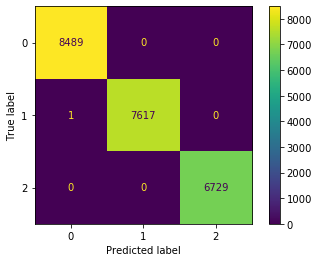

In [621]:
plot_confusion_matrix(ctree, X_train, y_train)

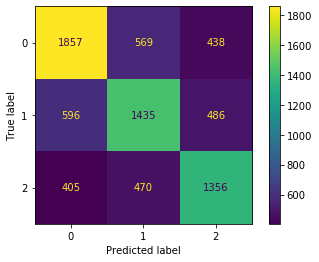

In [622]:
plot_confusion_matrix(ctree, X_test, y_test)

In [623]:
print(classification_report(y_train, ctree.predict(X_train)))
print(classification_report(y_test, ctree.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8489
           1       1.00      1.00      1.00      7618
           2       1.00      1.00      1.00      6729

    accuracy                           1.00     22836
   macro avg       1.00      1.00      1.00     22836
weighted avg       1.00      1.00      1.00     22836

              precision    recall  f1-score   support

           0       0.65      0.65      0.65      2864
           1       0.58      0.57      0.58      2517
           2       0.59      0.61      0.60      2231

    accuracy                           0.61      7612
   macro avg       0.61      0.61      0.61      7612
weighted avg       0.61      0.61      0.61      7612



In [572]:
tree.feature_importances_

array([0.01523285, 0.04073703, 0.07956391, 0.08192049, 0.0223472 ,
       0.00859652, 0.01612224, 0.02190059, 0.02892597, 0.0154106 ,
       0.02010478, 0.02054265, 0.04140175, 0.19406974, 0.13667028,
       0.06460833, 0.00535885, 0.00705984, 0.00714853, 0.03529344,
       0.07192566, 0.00878902, 0.        , 0.00872389, 0.00055414,
       0.01705401, 0.00142258, 0.00358172, 0.00614534, 0.00569934,
       0.00569822, 0.00026212, 0.00468103, 0.00244733])

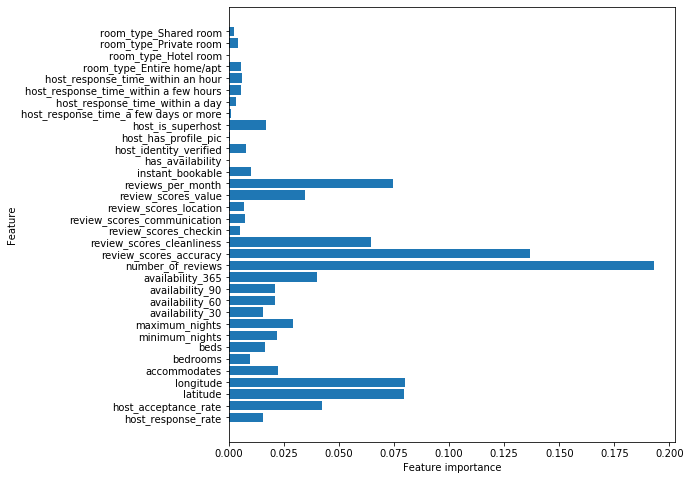

In [624]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(ctree)

Clear sign of overfitting because there is a max_depth of none on the training set. Test set has an accuracy of .61
For adjusting this model, consider GridSearchCV, and changing the criterion to entropy rather than gini.

[0.488395053959181, 0.6209473055712029, 0.6505057474087159, 0.6629861583304042, 0.6723139363725247, 0.6755983398591889, 0.672049896317944, 0.6688088535726948, 0.668983677942506, 0.661714038596432, 0.6534812535782206, 0.6511614155401828, 0.6460814168908889, 0.639206859132079, 0.6330327116503021, 0.6262013227712194, 0.6243196968278357, 0.6197651305964136, 0.615823217106081]


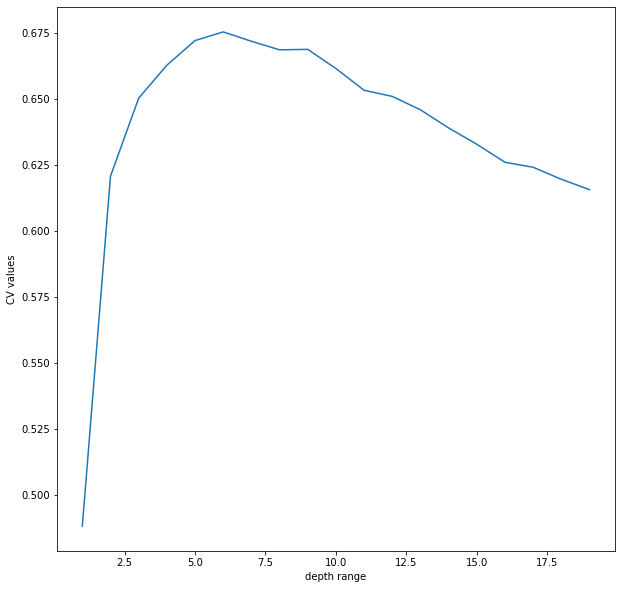

In [625]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(ctree, X_train, y_train, cv = 20)
score.mean()
depth_range = range(1, 20)
val = []
for depth in depth_range:
    ctree = DecisionTreeClassifier(max_depth = depth)
    depth_score = cross_val_score(ctree, X_train, y_train, cv = 20)
    val.append(depth_score.mean())
print(val)
plt.figure(figsize=(10,10))
plt.plot(depth_range, val)
plt.xlabel('depth range')
plt.ylabel('CV values')
plt.show()

In [589]:
from sklearn.model_selection import GridSearchCV

In [626]:
#Using GridSearchCV
tree_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, '6'],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': [None, 5, 7, 9, 10]
}

In [627]:
gs_tree = GridSearchCV(ctree, tree_params, cv=3)

gs_tree.fit(X_train, y_train)

print(f"Training Accuracy: {gs_tree.best_score_ :.2%}")
print("")
print(f"Optimal Parameters: {gs_tree.best_params_}")

Training Accuracy: 60.47%

Optimal Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'min_samples_split': 10}


In [828]:
ctree = DecisionTreeClassifier(max_depth=6, criterion='gini', min_samples_split=10)

ctree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_split=10)

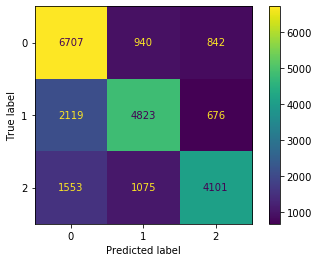

In [829]:
plot_confusion_matrix(ctree, X_train, y_train)

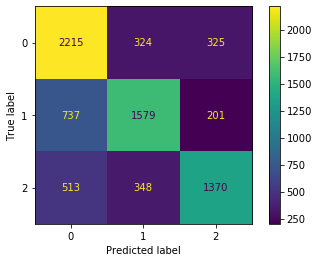

In [830]:
plot_confusion_matrix(ctree, X_test, y_test)

In [831]:
print(classification_report(y_train, ctree.predict(X_train)))
print(classification_report(y_test, ctree.predict(X_test)))

              precision    recall  f1-score   support

           0       0.65      0.79      0.71      8489
           1       0.71      0.63      0.67      7618
           2       0.73      0.61      0.66      6729

    accuracy                           0.68     22836
   macro avg       0.69      0.68      0.68     22836
weighted avg       0.69      0.68      0.68     22836

              precision    recall  f1-score   support

           0       0.64      0.77      0.70      2864
           1       0.70      0.63      0.66      2517
           2       0.72      0.61      0.66      2231

    accuracy                           0.68      7612
   macro avg       0.69      0.67      0.68      7612
weighted avg       0.68      0.68      0.68      7612



Accuracy improved by .07 and there is no sign of overfitting as the train and test scores are very similar.

In [638]:
ctree_ypred = ctree.predict(X_test)

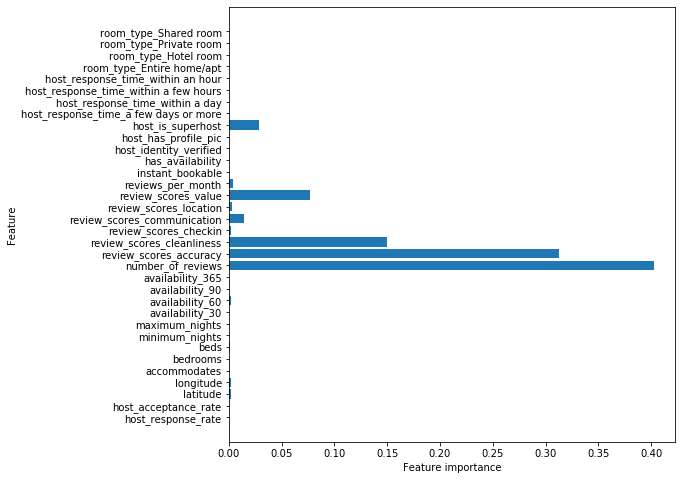

In [632]:
plot_feature_importances(ctree)

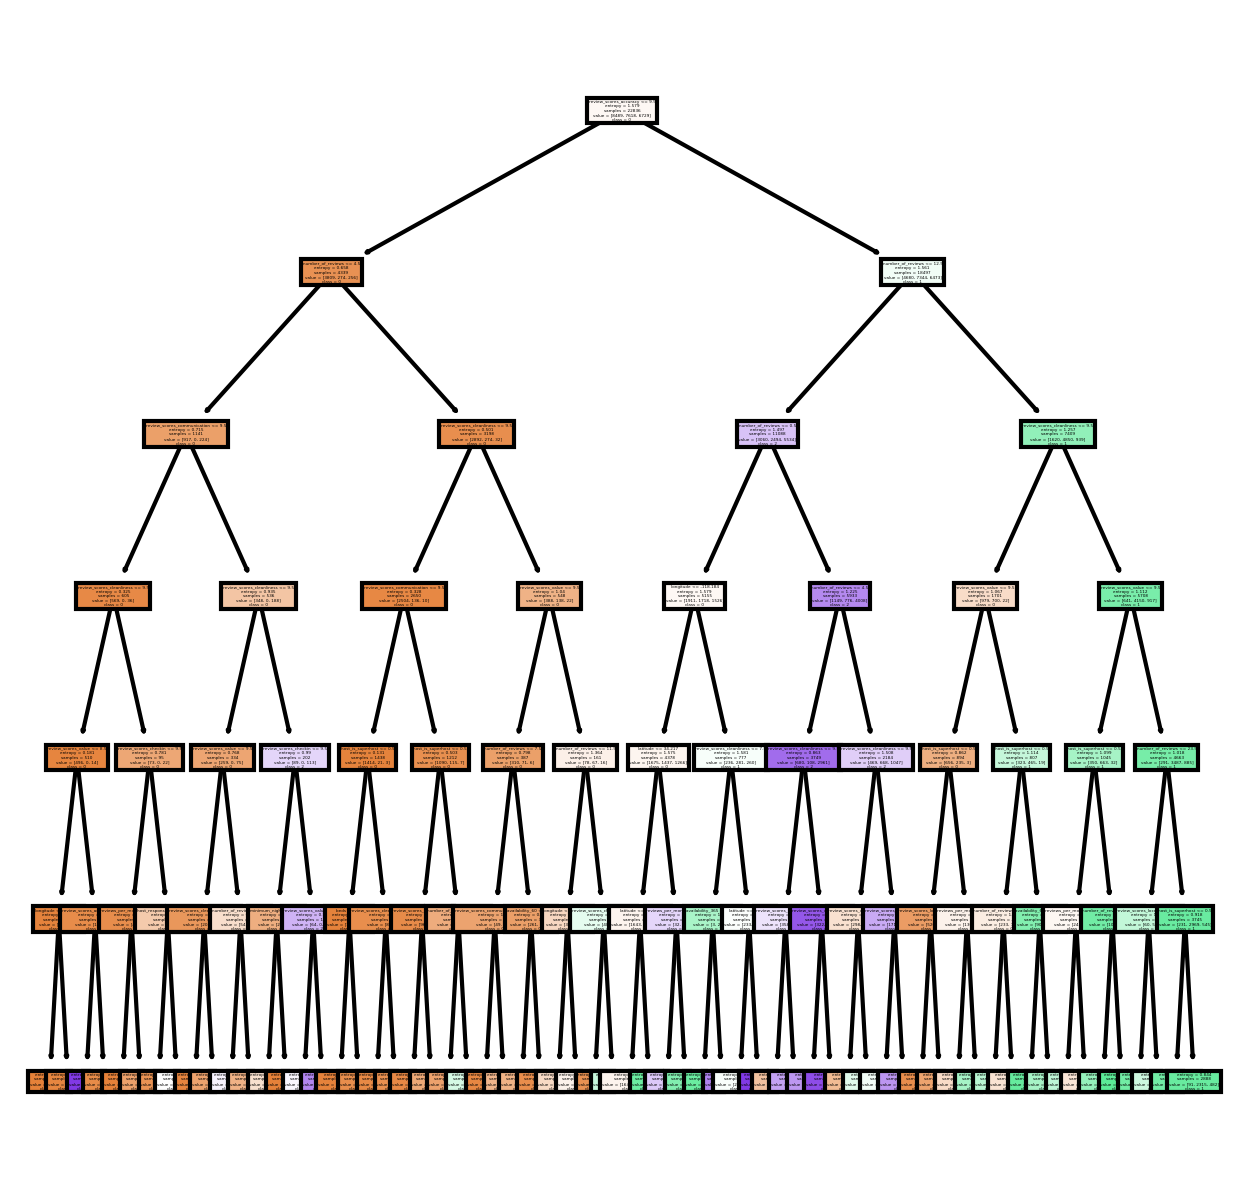

In [637]:
from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (5,5), dpi=300)
tree.plot_tree(ctree,
               feature_names = df2.columns, 
               class_names=np.unique(y).astype('str'),
               filled = True)
plt.show()

### Random Forests

Random forests modeling.

In [641]:
from sklearn.ensemble import RandomForestClassifier

In [711]:
rf = RandomForestClassifier()

# Fit classifier
rf.fit(X_train, y_train)

RandomForestClassifier()

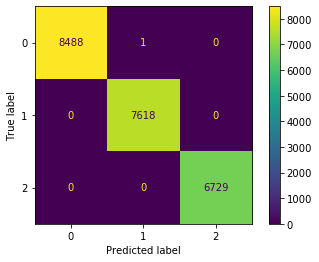

In [712]:
plot_confusion_matrix(rf, X_train, y_train)

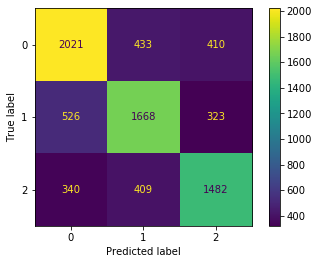

In [713]:
plot_confusion_matrix(rf, X_test, y_test)

In [714]:
print(classification_report(y_train, rf.predict(X_train)))
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8489
           1       1.00      1.00      1.00      7618
           2       1.00      1.00      1.00      6729

    accuracy                           1.00     22836
   macro avg       1.00      1.00      1.00     22836
weighted avg       1.00      1.00      1.00     22836

              precision    recall  f1-score   support

           0       0.70      0.71      0.70      2864
           1       0.66      0.66      0.66      2517
           2       0.67      0.66      0.67      2231

    accuracy                           0.68      7612
   macro avg       0.68      0.68      0.68      7612
weighted avg       0.68      0.68      0.68      7612



In [726]:
#Using GridSearchCV
rf_params = {
    'n_estimators': [30, 100],
    'max_depth': [2, 6, 10, 15],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [3, 6]
}

In [727]:
gs_rf = GridSearchCV(rf, rf_params, cv=3)

gs_rf.fit(X_train, y_train)

print(f"Optimal Parameters: {gs_rf.best_params_}")

Training Accuracy: 67.49%

Optimal Parameters: {'max_depth': 15, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 100}


In [715]:
from collections import OrderedDict
from sklearn.datasets import make_classification

ensemble_clfs = [
    ("Max_features='sqrt'",
        RandomForestClassifier(warm_start=True, oob_score=True,
                               max_features="sqrt",
                               random_state=123)),
    ("Max_features='log2'",
        RandomForestClassifier(warm_start=True, max_features='log2',
                               oob_score=True,
                               random_state=123)),
    ("Max_features=None",
        RandomForestClassifier(warm_start=True, max_features=None,
                               oob_score=True,
                               random_state=123))
]

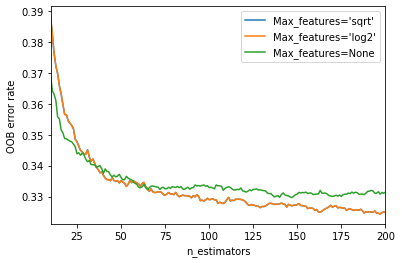

In [716]:
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

min_estimators = 10
max_estimators = 200

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X_train, y_train)

        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

In [762]:
rf = RandomForestClassifier(n_estimators=200, max_depth=15, min_samples_leaf=3, min_samples_split=10, \
                           criterion='entropy', max_features='log2')

# Fit classifier
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, max_features='log2',
                       min_samples_leaf=3, min_samples_split=10,
                       n_estimators=200)

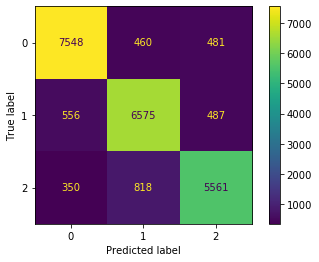

In [763]:
plot_confusion_matrix(rf, X_train, y_train)

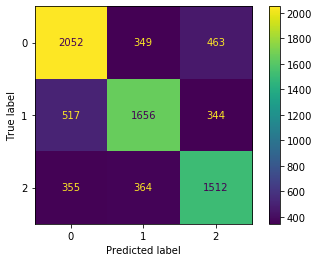

In [764]:
plot_confusion_matrix(rf, X_test, y_test)

In [765]:
print(classification_report(y_train, rf.predict(X_train)))
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      8489
           1       0.84      0.86      0.85      7618
           2       0.85      0.83      0.84      6729

    accuracy                           0.86     22836
   macro avg       0.86      0.86      0.86     22836
weighted avg       0.86      0.86      0.86     22836

              precision    recall  f1-score   support

           0       0.70      0.72      0.71      2864
           1       0.70      0.66      0.68      2517
           2       0.65      0.68      0.66      2231

    accuracy                           0.69      7612
   macro avg       0.68      0.68      0.68      7612
weighted avg       0.69      0.69      0.69      7612



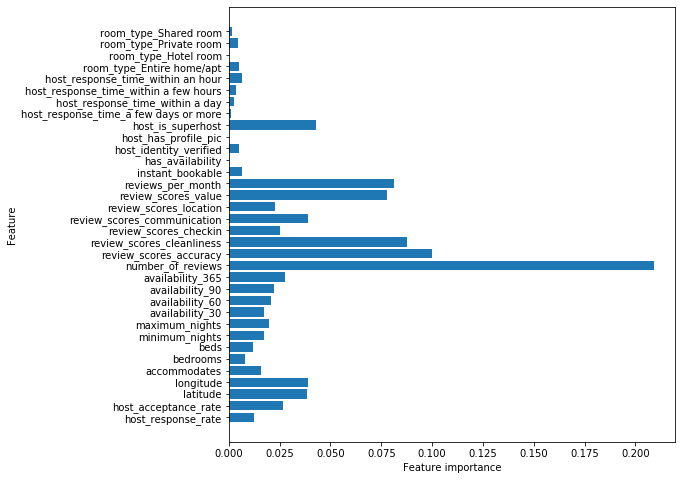

In [766]:
plot_feature_importances(rf)

### XGBoost

XGBoost modeling.

In [767]:
from xgboost import XGBClassifier

In [769]:
xgb = XGBClassifier()

# Fit classifier
xgb.fit(X_train, y_train)

XGBClassifier(objective='multi:softprob')

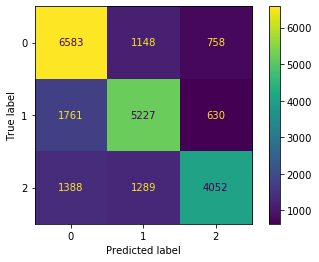

In [770]:
plot_confusion_matrix(xgb, X_train, y_train)

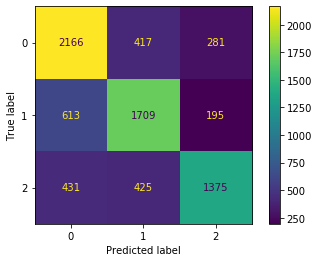

In [771]:
plot_confusion_matrix(xgb, X_test, y_test)

In [772]:
print(classification_report(y_train, xgb.predict(X_train)))
print(classification_report(y_test, xgb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.68      0.78      0.72      8489
           1       0.68      0.69      0.68      7618
           2       0.74      0.60      0.67      6729

    accuracy                           0.69     22836
   macro avg       0.70      0.69      0.69     22836
weighted avg       0.70      0.69      0.69     22836

              precision    recall  f1-score   support

           0       0.67      0.76      0.71      2864
           1       0.67      0.68      0.67      2517
           2       0.74      0.62      0.67      2231

    accuracy                           0.69      7612
   macro avg       0.70      0.68      0.69      7612
weighted avg       0.69      0.69      0.69      7612



In [815]:
xgb_params = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [6],
    'min_child_weight': [1, 2],
    'subsample': [0.5, 0.7],
    'n_estimators': [100],
}

In [823]:
gs_xgb = GridSearchCV(xgb, xgb_params, scoring='accuracy', cv=None, n_jobs=1)

gs_xgb.fit(X_train, y_train)

print(f"Optimal Parameters: {gs_xgb.best_params_}")

Optimal Parameters: {'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.7}


In [824]:
xgb = XGBClassifier(learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=100, \
                   subsample=0.7)

# Fit classifier
xgb.fit(X_train, y_train)

XGBClassifier(max_depth=6, objective='multi:softprob', subsample=0.7)

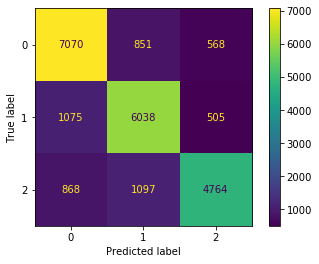

In [825]:
plot_confusion_matrix(xgb, X_train, y_train)

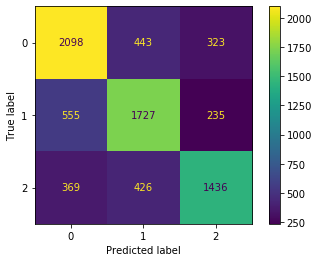

In [826]:
plot_confusion_matrix(xgb, X_test, y_test)

In [827]:
print(classification_report(y_train, xgb.predict(X_train)))
print(classification_report(y_test, xgb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.78      0.83      0.81      8489
           1       0.76      0.79      0.77      7618
           2       0.82      0.71      0.76      6729

    accuracy                           0.78     22836
   macro avg       0.79      0.78      0.78     22836
weighted avg       0.78      0.78      0.78     22836

              precision    recall  f1-score   support

           0       0.69      0.73      0.71      2864
           1       0.67      0.69      0.68      2517
           2       0.72      0.64      0.68      2231

    accuracy                           0.69      7612
   macro avg       0.69      0.69      0.69      7612
weighted avg       0.69      0.69      0.69      7612

